# ECE 143 Group 7 Costa Rica Poverty Level Prediction
Costa Rica is a country in central America with arount 5 million people, while in 2018, 21.1% of them are living in in proverty, with 0.3 million people living in extreme poverty.
- The big poverty gap in Costa Rica is a serious problem as 1.1 million people live in poverty!
- Investigating different relations between socio-economic parameters is a worthy task.
- Understanding the indicators and the factors affecting poverty will help us in tackling this problem in a better way

The objective of this project is to user various type of data collected in different ways online to help us predict the cause, factors, and ways to resolve poverty issues in Costa Rica.
To create nice visualizations and good insights, we originally used a kaggle dataset which contains 143 features as poverty level indicators. However we later realized this dataset is not enough for some insightful visualizations. Thus we went to collect data a few other sources, including scraping `google search data` from keywords, `Twitter` data scraping of the different president's posts, searching and processing official `census dataset` from official government department, etc.
<img src="https://image.slidesharecdn.com/sociales-151013022512-lva1-app6891/95/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg?cb=1444704104" alt="drawing" style="width:400px;"/>

In [2]:
# Load plotting script
import plot
cr = plot.Plot()

Start to load train...
train loaded.
Start to load test...
test loaded.
Start to load household_characteristics...
Processing... Please wait...
Start to load edu...
Start to load edu_lvl...


## Number of children / adult per household
This plot indicated as more income (richer) people get in Costa Rica, the households tends to have less children. We can also see that the number of people per household is slowly decreasing as we look through households with higher imcomes.

<img src="plots/Num_of_children_per_hh.png">


In [3]:
cr.plot_avg_num_per_hh()

# Household income

From the below shown plots, we can observe that the income inequality is getting higher and higher day by day and the rich is getting richer whereas the poor is not even improving according to the inflation rate.

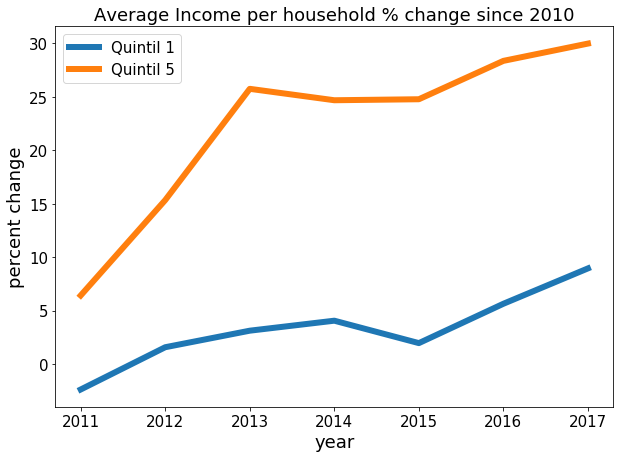

In [4]:
cr.plot_avg_income_change_since_2010()

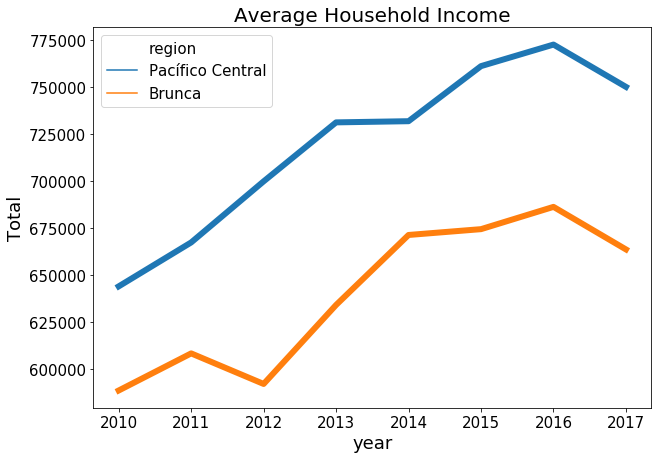

In [5]:

cr.plot_avg_hh_income_pc_b()

## Different regions lead by same Administration
Costa rica is divided into 6 regions by social economic parameter, however, administratively, it is divided into 7 provinces, each lead by a individual government. Interestingly, we obsere that `Pacifico Central` and `Brunca`, two different regions, are actually in the same province administratively, which means they are governed by the same government. As a result, we plotted the average household income per person over the year in those two provinces, and they do look parallel.

`We can conclude that the government has a big role to play to overcome poverty in Costa Rica!`

<img src="https://image.slidesharecdn.com/sociales-151013022512-lva1-app6891/95/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg?cb=1444704104" alt="drawing" style="width:400px;"/>
<img src="https://www.creescapes.com/wp-content/uploads/costa-rica-map.png" alt="drawing" style="width:400px;"/>

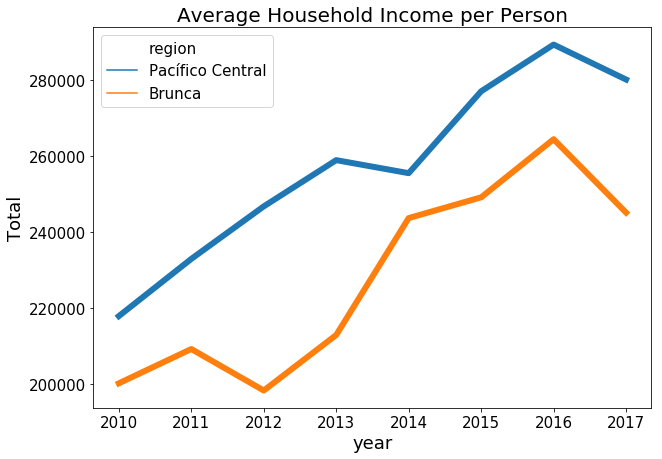

In [6]:
cr.plot_avg_hh_income_p_pc_b()

# Overcrowding: Number of person per room

From the plots below, we can conclude that the number of person per room is higher for people below poverty line

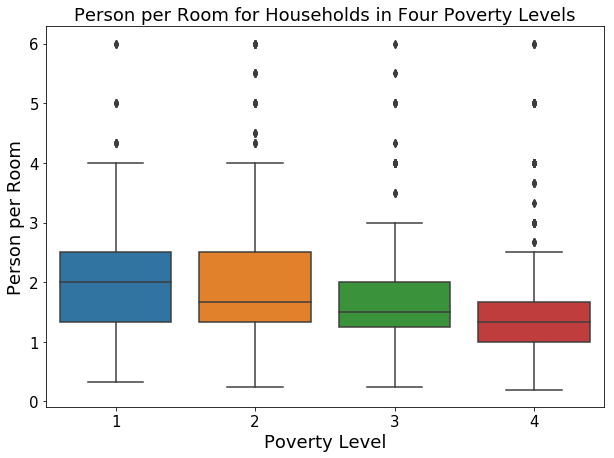

In [7]:
cr.plot_overcrowding()

In [8]:
cr.plot_poverty_laura()

The plot above shows the poverty level changes under the regime of President Laura Chinchilla and the plot below gives us information about the poverty level changes during President Luis Guillermo Solis' tenure. As observed in the twitter feeds of the two presidents and the plots here, we can conclude that President Luis Guillermo Solis has concentrated his efforts more towards eradicating poverty and development whereas President Laura Chinchilla is inclined more towards international problems rather than the domestic ones. Hence the poverty decline in President Luis Guillermo is as expected and President Laura Chinchilla has not focused enough to tackle this problem 

In [9]:
cr.plot_poverty_luis()

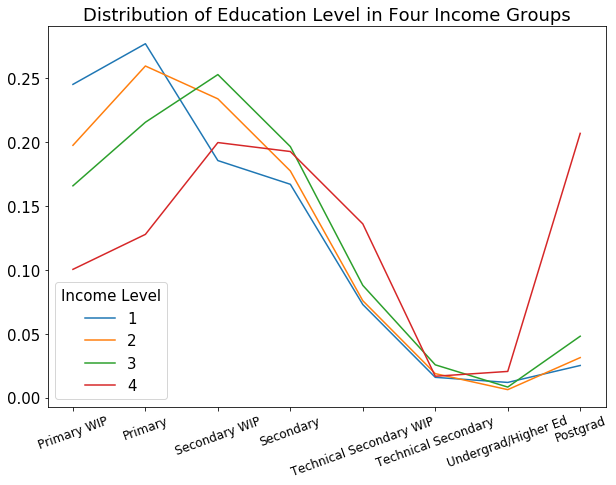

In [10]:
cr.plot_edu_level()

The Plot above provides us with information about education level of people from the four different income groups, we can observe that rich people are more likely to do PostGrad degrees whereas poor people do not get education more than primary school. Hence, we can conclude that education has a huge role to play in eradicating Poverty.

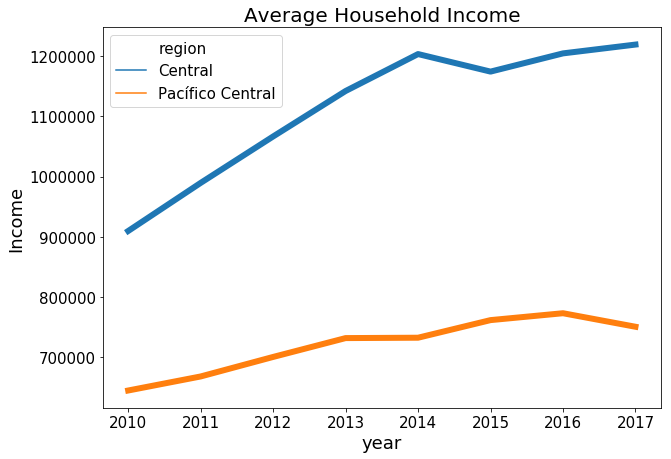

In [11]:
cr.plot_economy_income()

From the Plot above, we can infer that the average household income from 2010 to 2014 is increasing but after that it is getting stagnated. The reason behind this is the number of companies in the region. The heatmap below gives us detailed information about the number of companies in a given region from 2012 to 2017. And we can observe that the number of companies is increasing from 2012 to 2014, which also reflects in the above chart with increase in average income. After 2014, companies start leaving costa rica and the income starts to stagnate.

# Company Number Heatmap
Note that this heatmap will not work without an valid gmaps API Key. The API Key is expected to be stored in 'api_keys.py', at the same folder as this notebook. In the file, write gmap_key = 'AI......'

Installation see https://github.com/pbugnion/gmaps
<img src="plots/company_trend.gif">

In [28]:
import heat_map
years_locations = heat_map.load_companies_data()


In [29]:
heat_map.gmap_heat_map(years_locations[2012], '2012')

Figure(layout=FigureLayout(height='420px'))

# Data Scraping

In [19]:
# Preparation
from Twitter_data import *
from Data_scraping_v2 import *

## Run google search on the key words related to poverty
In order to find more factors causing the country's poverty, we ran a google web search on a list of keywords related to poverty, and from its appearance frequency, figure out some hidden insights.

``!!!The following cell will take approximately 15 minutes to execute``

In [20]:
data=web_search('poverty level indicators in costa rican households',['sanitation', 'food', 'jobs', 'inequality',
                                                                      'education','infrastructure','government',
                                                                      'resources','employment','home','housing',
                                                                      'development','economic','background'
                                                                     ],20)

In [21]:
wordcloud_google2=WordCloud(max_words=35628500,background_color='rgba(255, 255, 255, 0)', mode="RGBA").generate_from_frequencies(data)

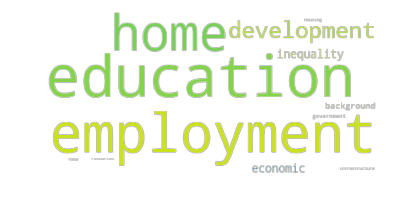

In [22]:
wordcloud_google2.to_file(os.getcwd() + "/results/google_search2.png")
    # show
plt.imshow(wordcloud_google2, interpolation="bilinear")
plt.axis("off")
plt.show()

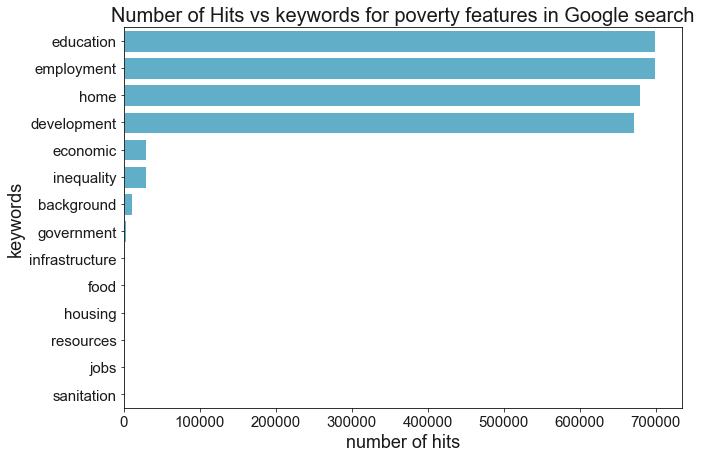

In [23]:
D2=pd.Series(data)
# D2=D2.drop(labels=['help','poor'])
D2=D2.sort_values(ascending=False)
# D2.plot.bar(rot=1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set(style='whitegrid')
sns.barplot(x=D2[:],y=D2.keys(), color="#4fb7db")
ax.set_xlabel("number of hits")
ax.set_ylabel("keywords")
ax.set_title('Number of Hits vs keywords for poverty features in Google search',fontsize=20)
plt.savefig(os.getcwd() + "/results/keyword_hits.png")

## Google maps API companies heatmap plotting



In [24]:
import heat_map
years_locations = heat_map.load_companies_data()

In [25]:
heat_map.gmap_heat_map(years_locations[2012], '2012')

Figure(layout=FigureLayout(height='420px'))

# Twitter Data Scraping

(We are directly using the downloaded Twitter data since we are not uploading API Keys to Github)

Since we find interesting pattern on the income level line plots, and the key changing point on that plot corresponds to a presendential change, we utilized Twitter API to scrap data from both presents' twitter posts, utilize google translate API (API key not provided in the repo), to translate it into English, and ran through again to generate a workcloud to visualize the difference.

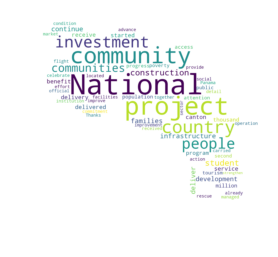

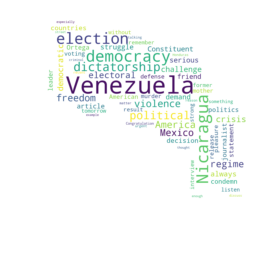

In [26]:
data1=cleaned_up_text(os.getcwd() + '/twitter_data/translated_Laura_ch_tweets.txt','Laura_Ch')
data2=cleaned_up_text(os.getcwd() + '/twitter_data/translated_CarlosAlvQ_tweets.txt','CarlosAlvQ')
data3=cleaned_up_text(os.getcwd() + '/twitter_data/translated_luisguillermosr_tweets.txt','luisguillermosr')
mask2=imr('costa_rica.jpg')
mask2=rgb2gray(mask2)
mask2[mask2>250]=255
mask2[mask2<250]=0
mask2=resize(mask2,(1200,1200))
wordcloud1 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data1)
wordcloud3 = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data3)
wordcloud_diff = find_diff(wordcloud1, wordcloud3)

makeImage_freq(dict(wordcloud_diff[0:60]),os.getcwd() + "/results/luisguiller")
makeImage_freq(dict(wordcloud_diff[-60:]),os.getcwd() + "/results/laura_ch")